# Regression Models using scikit-learn

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between the dependent and independent variables, they are considering and the number of independent variables being used.

![Alt text](https://scikit-learn.org/1.3/_static/ml_map.png)



### Step 1: Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, ElasticNet
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,  PolynomialFeatures
import ipywidgets as widgets
from IPython.display import display, Markdown
from sklearn.metrics import mean_absolute_error,root_mean_squared_error 

### Step 2: Reading the dataset:

In [3]:
df = pd.read_csv("Flappy_bird_dataset.csv")
df.head()

,bird_y,pipe_x,BIRD_VELOCITY,pipe_gap_y,reward
0,300,597,0.0,145,0.1
1,300,594,0.0,145,0.1
2,300,591,0.0,145,0.1
3,300,588,0.0,145,0.1
4,300,585,0.0,145,0.1


### Overview
The linear_regression function is designed to perform a complete linear regression analysis on a dataset. It includes steps for data preprocessing, model training, and evaluation.

**Steps in the Function**
### 1. **Handling Missing Values**

The function first identifies and displays any missing values in the dataset. It then fills these missing values with the mean of their respective columns to ensure the dataset is complete and ready for analysis.
### 2. Scaling the Data

The data is normalized using Min-Max scaling. This process rescales the feature values to a range between 0 and 1, which helps in improving the performance of the regression model.
### 3. Visualizing Relationships

A scatter plot with a polynomial fit is created to visualize the relationship between two specific variables. This helps to understand how one variable relates to another.
### 4. Analyzing Feature Correlation

The function calculates the correlation between features and displays this information as a heatmap. The correlation matrix is squared and expressed as percentages to highlight the strength of relationships between variables.
### 5. Selecting Relevant Features

Based on the correlation matrix, features that have a significant correlation with the target variable are selected. Only features with a correlation higher than a specified threshold are retained for model training.
### 6. Splitting the Data

The dataset is divided into feature variables and the target variable. It is then split into training and testing sets, with a portion of the data reserved for testing the model’s performance.
### 7. Training the Model

A linear regression model is trained using the training data. This involves fitting the model to the training features and target variable.
### 8. Evaluating Model Performance

The trained model is evaluated using the test data. The performance score (R² value) of the model is calculated and displayed as a percentage.
### 9. Visualizing Predictions

A scatter plot is used to compare the true values of the target variable with the model's predicted values. This visualization helps in assessing how well the model's predictions align with actual data.
### 10.Exploring Results

A subset of the dataset is used to further explore the relationship between key variables with an additional scatter plot and polynomial fit.
Evaluating Error Metrics

The function calculates Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) to measure the accuracy and error of the model’s predictions.
**Summary**
The linear_regression function provides a thorough analysis pipeline that includes data cleaning, normalization, feature selection, model training, and evaluation. It uses various visualizations and metrics to ensure a comprehensive understanding of the data and the performance of the linear regression model.

# **Linear Regression**

### **Null values in the dataset**

bird_y           0
pipe_x           0
BIRD_VELOCITY    0
pipe_gap_y       0
reward           0
dtype: int64


### **Filling the Null values with mean**


   bird_y  pipe_x  BIRD_VELOCITY  pipe_gap_y  reward
0     300     597            0.0         145     0.1
1     300     594            0.0         145     0.1
2     300     591            0.0         145     0.1
3     300     588            0.0         145     0.1
4     300     585            0.0         145     0.1


### **Scalled Dataset**


,bird_y,pipe_x,BIRD_VELOCITY,pipe_gap_y,reward
0,0.088058,1.000000,0.172932,0.355978,1.0
1,0.088058,0.995349,0.172932,0.355978,1.0
2,0.088058,0.990698,0.172932,0.355978,1.0
3,0.088058,0.986047,0.172932,0.355978,1.0
4,0.088058,0.981395,0.172932,0.355978,1.0


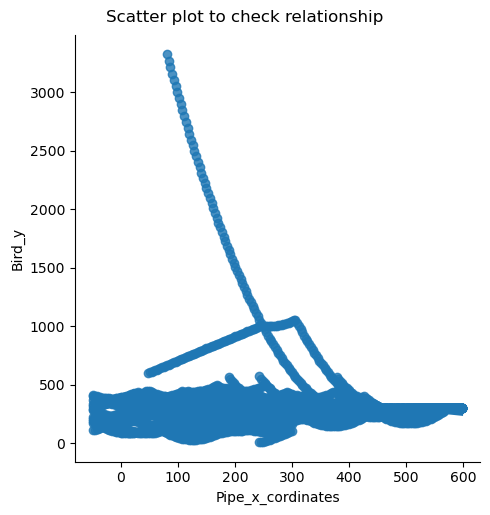

### **Correlation between Features**


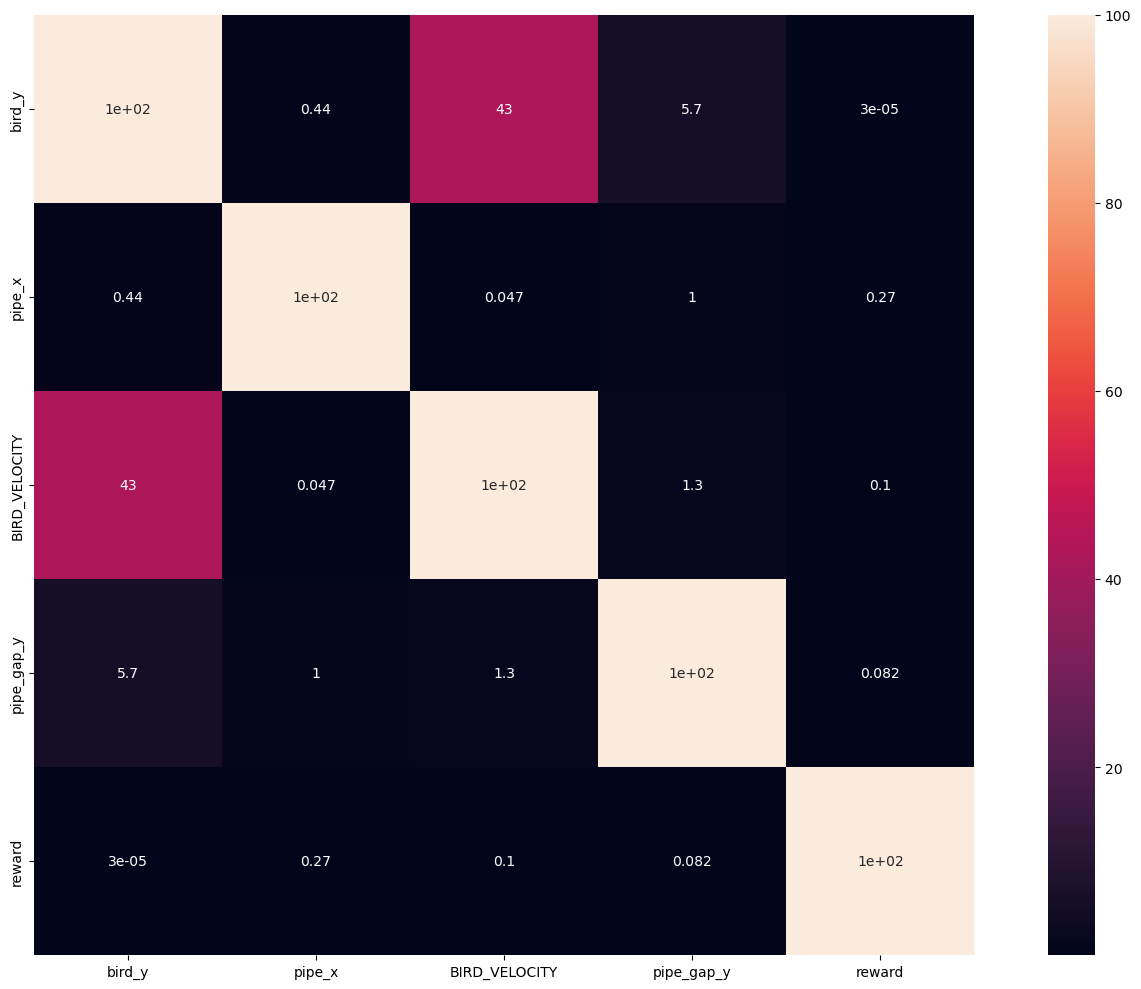

### **Selecting best features**


 Best Features with correlation more than 0.3: ['bird_y', 'pipe_x', 'BIRD_VELOCITY', 'pipe_gap_y']



,bird_y,pipe_x,BIRD_VELOCITY,pipe_gap_y
0,300,597,0.0,145
1,300,594,0.0,145
2,300,591,0.0,145
3,300,588,0.0,145
4,300,585,0.0,145


### **Spliting the data into target and features**


### **Training the model**


LinearRegression()

#### **Score of the Model**


50.69313413255865

### **Visualization**

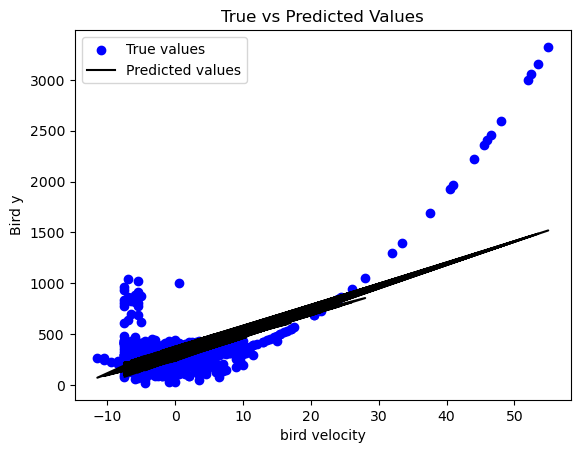

Exploring our results

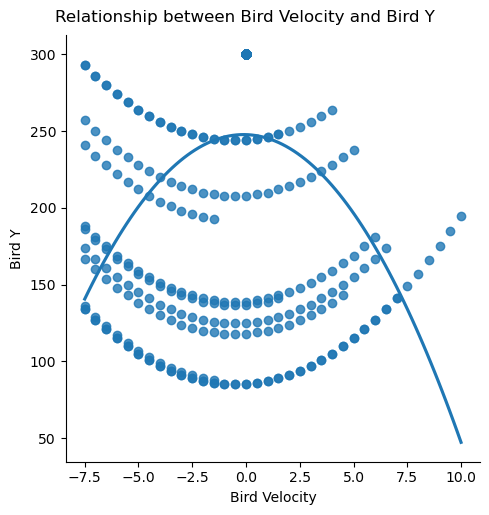

### **Evaluation**

MAE: 119.4936851726602
RMSE: 215.88666060837372


In [5]:
def linear_regrassion(df):
    #Finding tthe Null Values
    scale = MinMaxScaler()
    display(Markdown('# **Linear Regression**'))
    display(Markdown('### **Null values in the dataset**'))
    null_value = df.isna().sum()
    print(null_value)

    #Filling the null values
    display(Markdown('### **Filling the Null values with mean**\n'))
    df_filled = df.fillna(df.mean())
    print(df_filled.head())

    df_scaled = pd.DataFrame(scale.fit_transform(df), columns = df.columns)
    display(Markdown('### **Scalled Dataset**\n'))
    display(df_scaled.head())

    #plotting the Scatter plot to check relationship
    g = sns.lmplot(x ="pipe_x", y ="bird_y", data = df, order = 2, ci = None) 
    # Set the title and labels using the FacetGrid object
    g.set_axis_labels('Pipe_x_cordinates', 'Bird_y')
    g.fig.suptitle('Scatter plot to check relationship', y=1.02)
    plt.show()

    display(Markdown('### **Correlation between Features**\n'))
    corr = ((df_scaled.corr().abs()**2)*100)
    plt.figure(figsize = (15,10))
    sns.heatmap(corr, annot=True, square = True)
    plt.tight_layout()
    plt.show()

    display(Markdown('### **Selecting best features**\n'))
    threshold = .3
    feature_selection = [cols for cols in corr.columns if abs(corr[cols]["bird_y"] >= threshold)]
    print(f" Best Features with correlation more than {threshold}: {feature_selection}\n")
    df = df[feature_selection]
    display(df.head())

    display(Markdown('### **Spliting the data into target and features**\n'))
    x = df.drop(['bird_y'], axis = 1)
    y = df['bird_y']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    display(Markdown('### **Training the model**\n'))
    model = LinearRegression()
    df_model = model.fit(x_train, y_train)
    display(df_model)

    display(Markdown('#### **Score of the Model**\n'))
    display(model.score(x_test, y_test)*100)

    #visulaion of the dataset with linear regresssion
    display(Markdown('### **Visualization**'))
    y_pred = model.predict(x_test)
    
    # Plotting
    plt.scatter(x_test.iloc[:,1], y_test, color='b', label='True values') 
    plt.plot(x_test.iloc[:,1], y_pred, color='k', label='Predicted values') 
    plt.xlabel('bird velocity')        
    plt.ylabel('Bird y')          
    plt.title('True vs Predicted Values')
    plt.legend()                  
    plt.show()

    display(Markdown('Exploring our results'))
    df_subset = df.head(500)
    g = sns.lmplot(x="BIRD_VELOCITY", y="bird_y", data=df_subset, order=2, ci=None)
    g.set_axis_labels('Bird Velocity', 'Bird Y')  # Set axis labels
    g.fig.suptitle('Relationship between Bird Velocity and Bird Y', y=1.02)  # Set title and adjust position
    plt.show()

    display(Markdown('### **Evaluation**'))
    mae = mean_absolute_error(y_true=y_test,y_pred=y_pred) 
    rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred) 
      
    print("MAE:",mae) 
    print("RMSE:",rmse)

linear_regrassion(df)

### Overview

The `ALL-Below` function is designed to perform ridge regression analysis on a dataset. Ridge regression is a type of linear regression that includes a regularization term to prevent overfitting. The function covers data preprocessing, model training, and evaluation.

### Steps in the Function

1. **Handling Missing Values**
   - The function begins by identifying and displaying any missing values in the dataset. It then fills these missing values with the mean of their respective columns to ensure the dataset is complete.

2. **Scaling the Data**
   - The dataset is normalized using Min-Max scaling, which rescales feature values to a range between 0 and 1. This step is crucial for ensuring that all features contribute equally to the model.

3. **Visualizing Relationships**
   - A scatter plot with a polynomial fit is created to visualize the relationship between two specific variables (`pipe_x` and `bird_y`). This helps in understanding how one variable relates to another.

4. **Analyzing Feature Correlation**
   - The function calculates and displays the correlation matrix of the scaled dataset as a heatmap. The matrix is squared and expressed as percentages to highlight the strength of relationships between variables.

5. **Selecting Relevant Features**
   - Features are selected based on their correlation with the target variable `bird_y`. Only those features with a correlation above a specified threshold (0.3) are kept for further analysis.

6. **Splitting the Data**
   - The dataset is split into feature variables (`x`) and the target variable (`y`). This data is then divided into training and testing sets, with 20% of the data used for testing.

7. **Training the Ridge Regression Model**
   - A Ridge regression model is instantiated with a specified regularization parameter (`alpha`) and trained using the training data. Ridge regression helps in handling multicollinearity by adding a penalty to the size of the coefficients.

8. **Evaluating Model Performance**
   - The model's performance is evaluated using the test data. The R² score of the model is computed and displayed as a percentage.

9. **Visualizing Predictions**
   - A scatter plot is used to compare the true values of the target variable with the predicted values from the model. This visualization helps in assessing the accuracy of the model’s predictions.

10. **Evaluating Error Metrics**
    - The function calculates and prints Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) to measure the accuracy and error of the model’s predictions.

### Summary

The `ALL-Below` function provides a full pipeline for performing ridge regression analysis. It includes steps for data preprocessing, model training, and evaluation, with visualizations to help understand relationships in the data and the performance of the model. The use of ridge regression helps address potential overfitting issues by incorporating regularization.

#### 1. **Ridge Regression**
   - **Strengths:**
     - Reduces overfitting by adding a penalty to large coefficients.
     - Handles multicollinearity well by shrinking coefficients.
     - Often leads to better generalization on unseen data.
   - **Weaknesses:**
     - Can still struggle with very high-dimensional data where many features are irrelevant.
     - May not perform well if the assumption of linearity is significantly violated.

![local](images/ridge.png)

# **Ridge Regression**

### **Null values in the dataset**

bird_y           0
pipe_x           0
BIRD_VELOCITY    0
pipe_gap_y       0
reward           0
dtype: int64


### **Filling the Null values with mean**


   bird_y  pipe_x  BIRD_VELOCITY  pipe_gap_y  reward
0     300     597            0.0         145     0.1
1     300     594            0.0         145     0.1
2     300     591            0.0         145     0.1
3     300     588            0.0         145     0.1
4     300     585            0.0         145     0.1


### **Scaled Dataset**


,bird_y,pipe_x,BIRD_VELOCITY,pipe_gap_y,reward
0,0.088058,1.000000,0.172932,0.355978,1.0
1,0.088058,0.995349,0.172932,0.355978,1.0
2,0.088058,0.990698,0.172932,0.355978,1.0
3,0.088058,0.986047,0.172932,0.355978,1.0
4,0.088058,0.981395,0.172932,0.355978,1.0


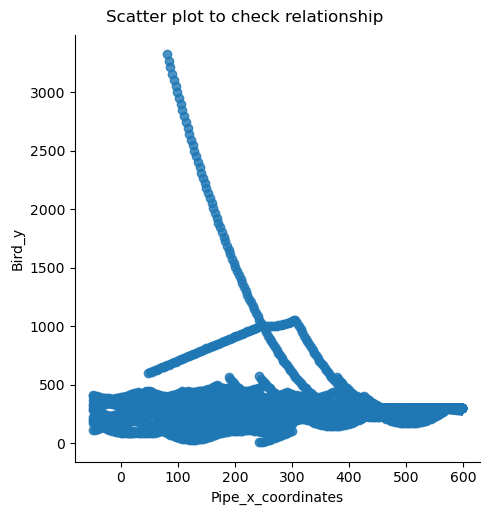

### **Correlation between Features**


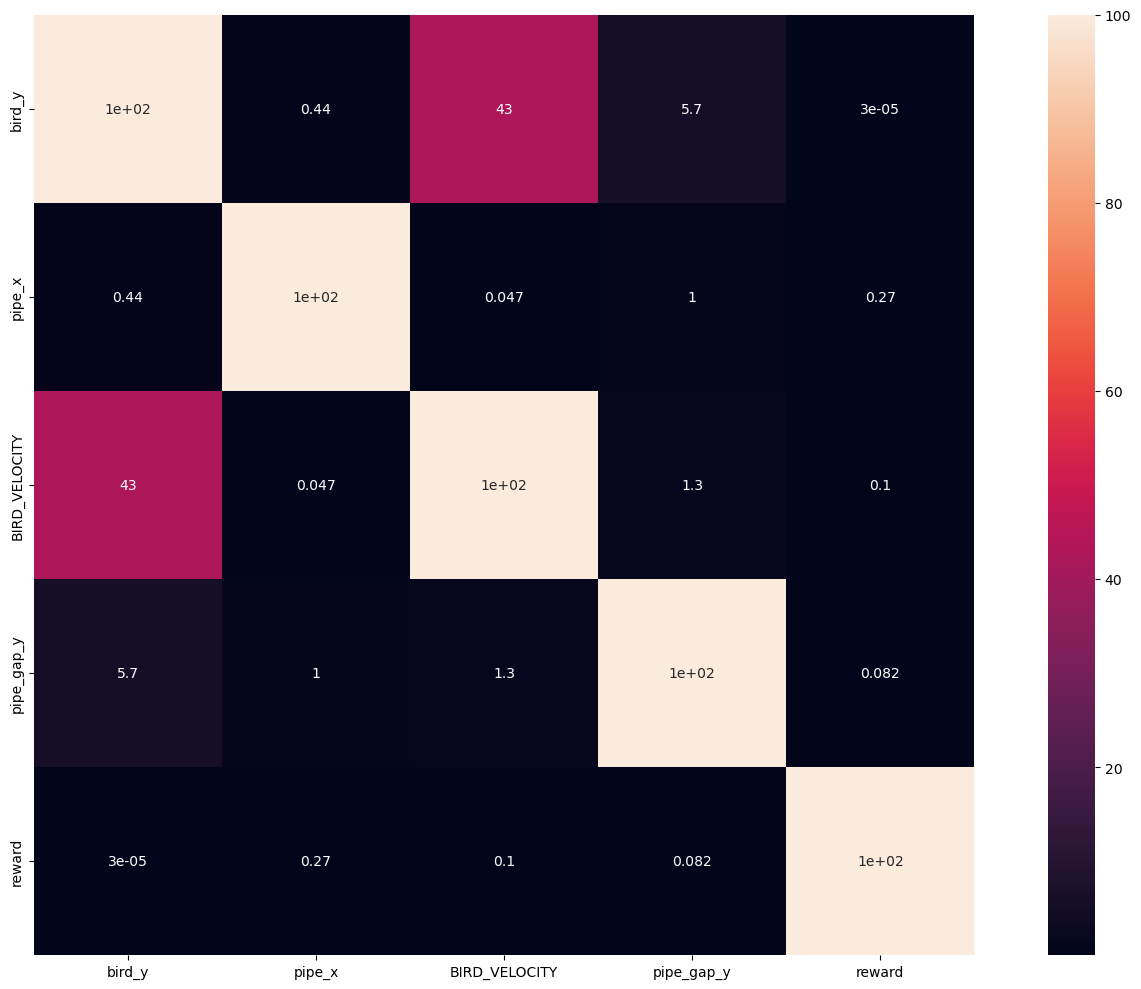

### **Selecting Best Features**


Best Features with correlation more than 0.3: ['bird_y', 'pipe_x', 'BIRD_VELOCITY', 'pipe_gap_y']



,bird_y,pipe_x,BIRD_VELOCITY,pipe_gap_y
0,300,597,0.0,145
1,300,594,0.0,145
2,300,591,0.0,145
3,300,588,0.0,145
4,300,585,0.0,145


### **Splitting the Data into Target and Features**


### **Training the Model**


#### **Score of the Model**


Model Score: 50.69%


### **Visualization**

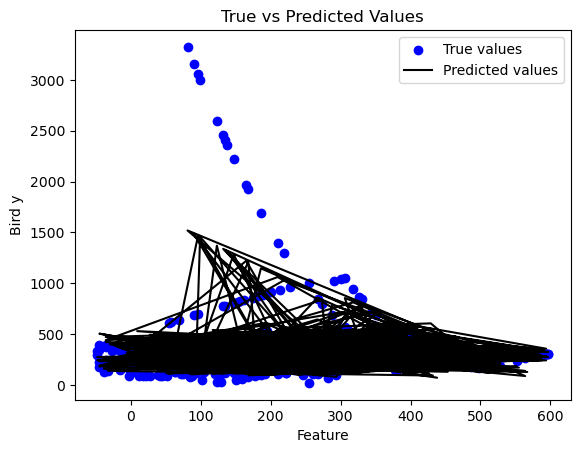

### **Evaluation**

MAE: 119.49
RMSE: 215.89


In [12]:
def ridge_regression(df, alpha=1.0):
    # Initialize the MinMaxScaler
    scale = MinMaxScaler()
    display(Markdown('# **Ridge Regression**'))
    # Display null values
    display(Markdown('### **Null values in the dataset**'))
    null_value = df.isna().sum()
    print(null_value)

    # Fill null values with mean
    display(Markdown('### **Filling the Null values with mean**\n'))
    df_filled = df.fillna(df.mean())
    print(df_filled.head())

    # Scale the dataset
    df_scaled = pd.DataFrame(scale.fit_transform(df_filled), columns=df_filled.columns)
    display(Markdown('### **Scaled Dataset**\n'))
    display(df_scaled.head())

    # Plot scatter plot to check relationship
    g = sns.lmplot(x="pipe_x", y="bird_y", data=df_filled, order=2, ci=None)
    g.set_axis_labels('Pipe_x_coordinates', 'Bird_y')
    g.fig.suptitle('Scatter plot to check relationship', y=1.02)
    plt.show()

    # Compute correlation
    display(Markdown('### **Correlation between Features**\n'))
    corr = (df_scaled.corr().abs()**2) * 100
    plt.figure(figsize=(15, 10))
    sns.heatmap(corr, annot=True, square=True)
    plt.tight_layout()
    plt.show()

    # Select best features
    display(Markdown('### **Selecting Best Features**\n'))
    threshold = 0.3
    feature_selection = [col for col in corr.columns if abs(corr[col]["bird_y"]) >= threshold]
    print(f"Best Features with correlation more than {threshold}: {feature_selection}\n")
    df_filled = df_filled[feature_selection]
    display(df_filled.head())

    # Split the data into target and features
    display(Markdown('### **Splitting the Data into Target and Features**\n'))
    x = df_filled.drop(['bird_y'], axis=1)
    y = df_filled['bird_y']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Train the Ridge Regression model
    display(Markdown('### **Training the Model**\n'))
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)

    # Evaluate the model
    display(Markdown('#### **Score of the Model**\n'))
    score = model.score(x_test, y_test) * 100
    print(f"Model Score: {score:.2f}%")

    # Visualization
    display(Markdown('### **Visualization**'))
    y_pred = model.predict(x_test)
    
    # Plotting
    plt.scatter(x_test.iloc[:, 0], y_test, color='b', label='True values') 
    plt.plot(x_test.iloc[:, 0], y_pred, color='k', label='Predicted values') 
    plt.xlabel('Feature')        
    plt.ylabel('Bird y')          
    plt.title('True vs Predicted Values')
    plt.legend()                  
    plt.show()

    # Evaluation metrics
    display(Markdown('### **Evaluation**'))
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

ridge_regression(df, alpha=1.0)

The `Lasso` is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. For this reason, Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero coefficients (see Compressive sensing: tomography reconstruction with L1 prior (Lasso)).

Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize i

![local](images/lasso.png)s:

#### 2. **Lasso Regression**
   - **Strengths:**
     - Performs feature selection by shrinking some coefficients to zero, effectively reducing the number of features.
     - Useful for interpreting the model by identifying the most relevant features.
     - Can handle multicollinearity.
   - **Weaknesses:**
     - Can be sensitive to the choice of the regularization parameter (`alpha`).
     - May struggle if the relevant features are highly correlated.

![local](images/lasso1.png)

# **Lasso Regression**

### **Null values in the dataset**

bird_y           0
pipe_x           0
BIRD_VELOCITY    0
pipe_gap_y       0
reward           0
dtype: int64


### **Filling the Null values with mean**


   bird_y  pipe_x  BIRD_VELOCITY  pipe_gap_y  reward
0     300     597            0.0         145     0.1
1     300     594            0.0         145     0.1
2     300     591            0.0         145     0.1
3     300     588            0.0         145     0.1
4     300     585            0.0         145     0.1


### **Scaled Dataset**


,bird_y,pipe_x,BIRD_VELOCITY,pipe_gap_y,reward
0,0.088058,1.000000,0.172932,0.355978,1.0
1,0.088058,0.995349,0.172932,0.355978,1.0
2,0.088058,0.990698,0.172932,0.355978,1.0
3,0.088058,0.986047,0.172932,0.355978,1.0
4,0.088058,0.981395,0.172932,0.355978,1.0


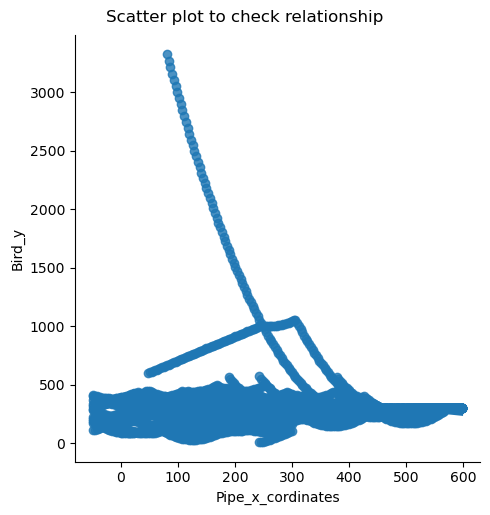

### **Correlation between Features**


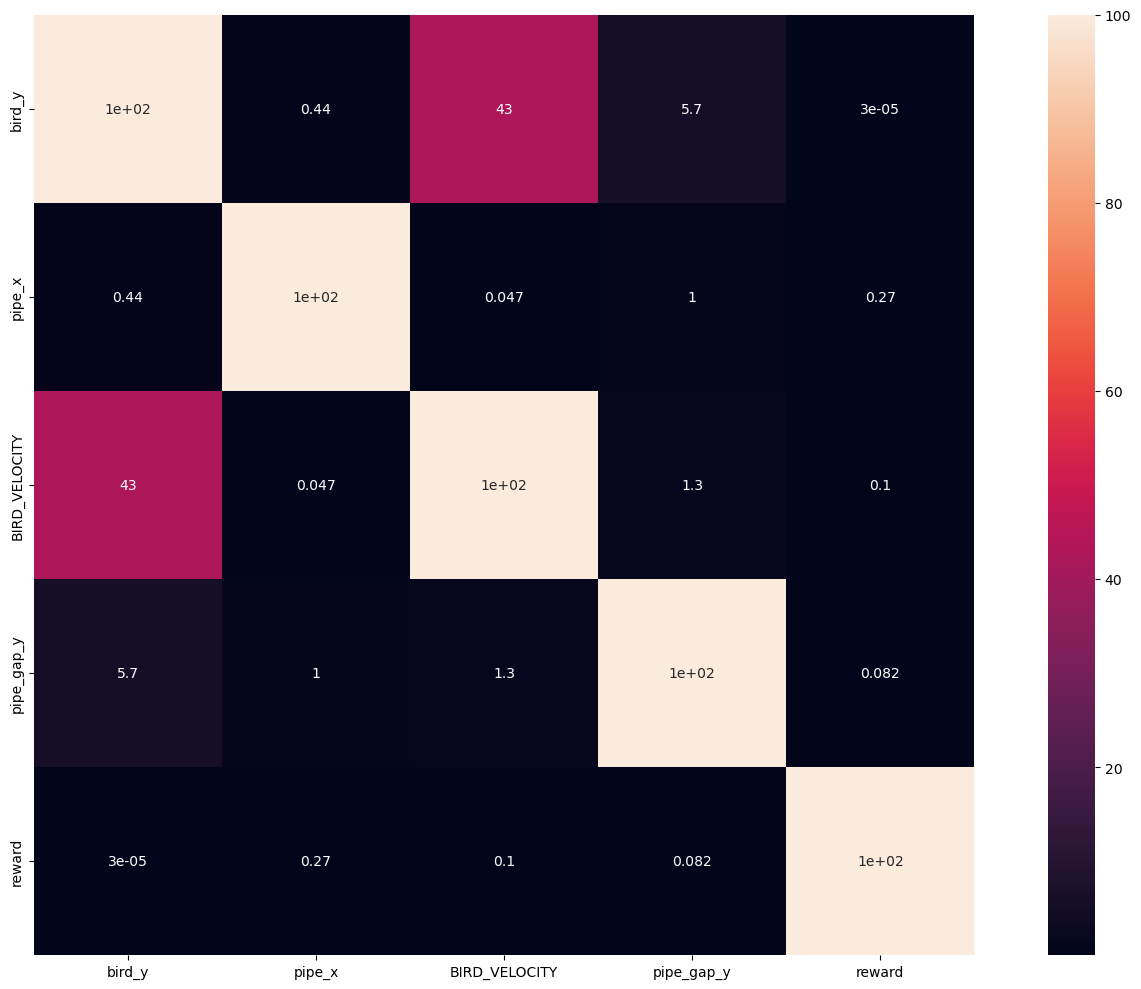

### **Selecting best features**


Best Features with correlation more than 0.3: ['bird_y', 'pipe_x', 'BIRD_VELOCITY', 'pipe_gap_y']



### **Splitting the data into target and features**


### **Training the model**


#### **Score of the Model**


Model Score: 50.68%


### **Visualization**

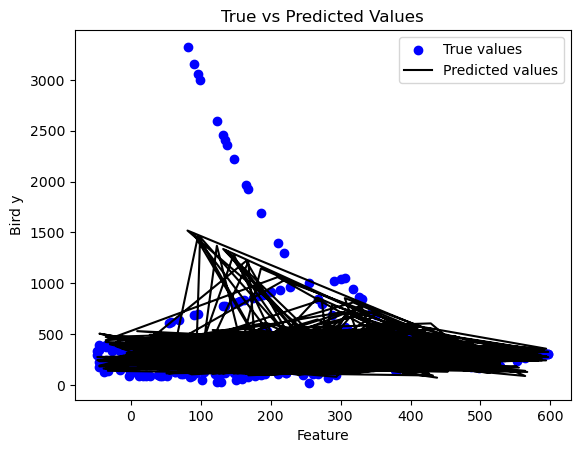

### **Evaluation**

MAE: 119.46
RMSE: 215.93


In [17]:
def lasso_regression(df, alpha=1.0):
    display(Markdown('# **Lasso Regression**'))
    scale = MinMaxScaler()
    display(Markdown('### **Null values in the dataset**'))
    print(df.isna().sum())

    display(Markdown('### **Filling the Null values with mean**\n'))
    df_filled = df.fillna(df.mean())
    print(df_filled.head())

    df_scaled = pd.DataFrame(scale.fit_transform(df_filled), columns=df_filled.columns)
    display(Markdown('### **Scaled Dataset**\n'))
    display(df_scaled.head())

    g = sns.lmplot(x="pipe_x", y="bird_y", data=df_filled, order=2, ci=None)
    g.set_axis_labels('Pipe_x_cordinates', 'Bird_y')
    g.fig.suptitle('Scatter plot to check relationship', y=1.02)
    plt.show()

    display(Markdown('### **Correlation between Features**\n'))
    corr = ((df_scaled.corr().abs()**2)*100)
    plt.figure(figsize=(15,10))
    sns.heatmap(corr, annot=True, square=True)
    plt.tight_layout()
    plt.show()

    display(Markdown('### **Selecting best features**\n'))
    threshold = .3
    feature_selection = [cols for cols in corr.columns if abs(corr[cols]["bird_y"]) >= threshold]
    print(f"Best Features with correlation more than {threshold}: {feature_selection}\n")
    df_filled = df_filled[feature_selection]

    display(Markdown('### **Splitting the data into target and features**\n'))
    x = df_filled.drop(['bird_y'], axis=1)
    y = df_filled['bird_y']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    display(Markdown('### **Training the model**\n'))
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)

    display(Markdown('#### **Score of the Model**\n'))
    print(f"Model Score: {model.score(x_test, y_test)*100:.2f}%")

    display(Markdown('### **Visualization**'))
    y_pred = model.predict(x_test)
    plt.scatter(x_test.iloc[:,0], y_test, color='b', label='True values') 
    plt.plot(x_test.iloc[:,0], y_pred, color='k', label='Predicted values') 
    plt.xlabel('Feature')        
    plt.ylabel('Bird y')          
    plt.title('True vs Predicted Values')
    plt.legend()                  
    plt.show()

    display(Markdown('### **Evaluation**'))
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
lasso_regression(df, alpha=1.0)

`Polynomial regression` is a type of regression analysis where the relationship between the independent variable 
𝑥
x and the dependent variable 
𝑦
y is modeled as an 
𝑛
n-th degree polynomial. This method is useful when the data shows a curvilinear relationship.

#### 3. **Polynomial Regression**
   - **Strengths:**
     - Captures non-linear relationships between the features and the target variable.
     - Can provide a good fit to the data if the correct polynomial degree is chosen.
   - **Weaknesses:**
     - Prone to overfitting, especially with higher-degree polynomials.
     - Can become computationally expensive with large datasets or high-degree polynomials.
     - Interpretation of the model becomes more complex with higher-degree terms.

![local](images/poly.png)

# **Polynomial Regression**

### **Null values in the dataset**

bird_y           0
pipe_x           0
BIRD_VELOCITY    0
pipe_gap_y       0
reward           0
dtype: int64


### **Filling the Null values with mean**


   bird_y  pipe_x  BIRD_VELOCITY  pipe_gap_y  reward
0     300     597            0.0         145     0.1
1     300     594            0.0         145     0.1
2     300     591            0.0         145     0.1
3     300     588            0.0         145     0.1
4     300     585            0.0         145     0.1


### **Scaled Dataset**


,bird_y,pipe_x,BIRD_VELOCITY,pipe_gap_y,reward
0,0.088058,1.000000,0.172932,0.355978,1.0
1,0.088058,0.995349,0.172932,0.355978,1.0
2,0.088058,0.990698,0.172932,0.355978,1.0
3,0.088058,0.986047,0.172932,0.355978,1.0
4,0.088058,0.981395,0.172932,0.355978,1.0


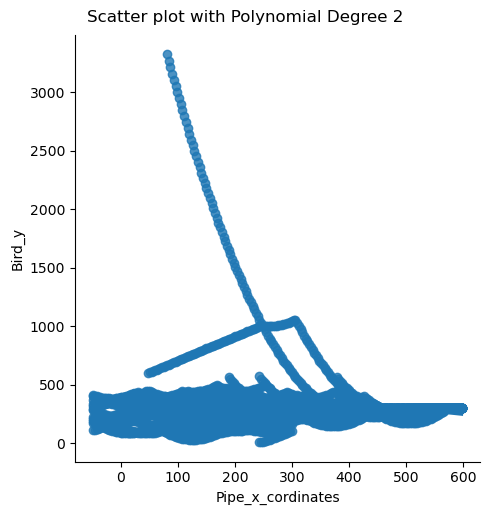

### **Correlation between Features**


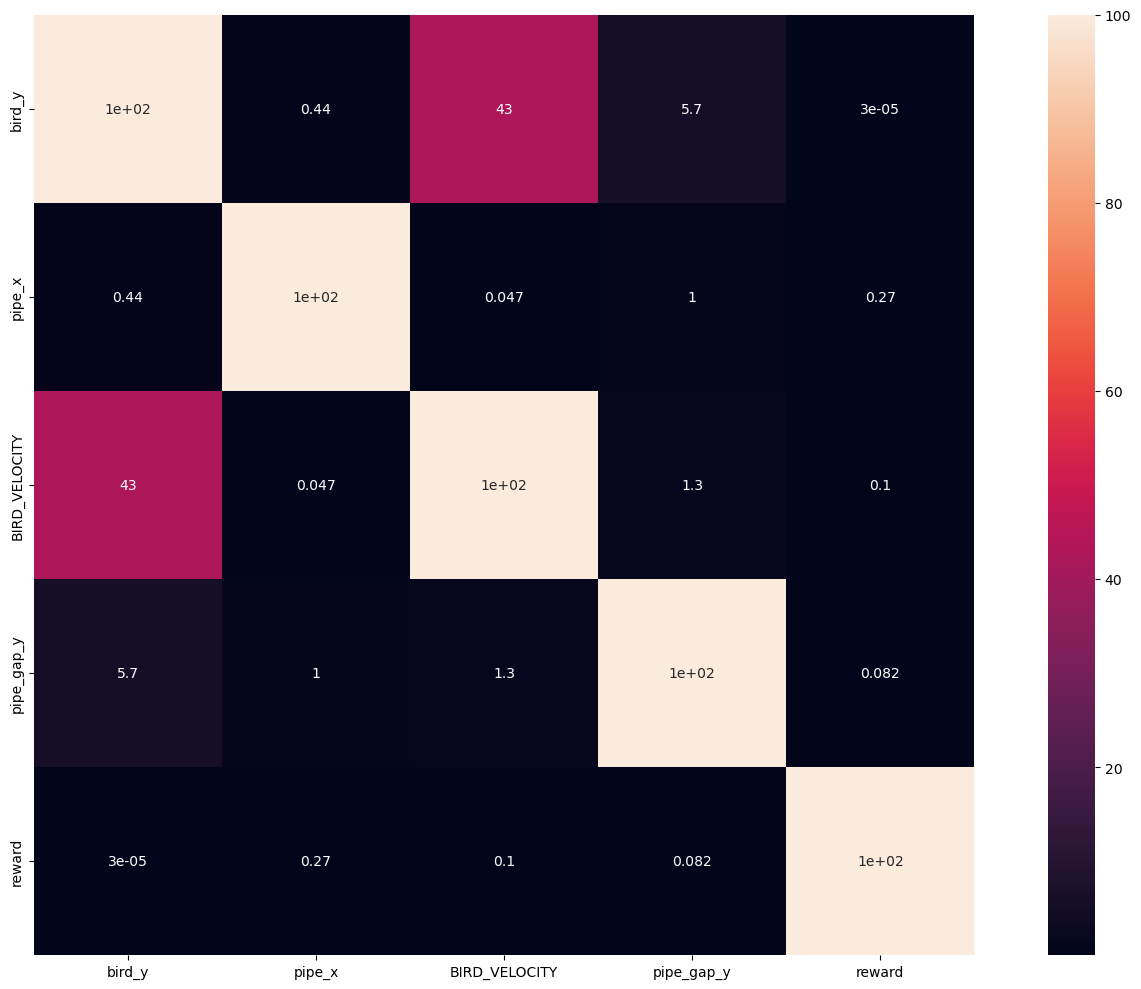

### **Selecting best features**


Best Features with correlation more than 0.3: ['bird_y', 'pipe_x', 'BIRD_VELOCITY', 'pipe_gap_y']



### **Splitting the data into target and features**


### **Training the model**


#### **Score of the Model**


Model Score: 87.37%


### **Visualization**

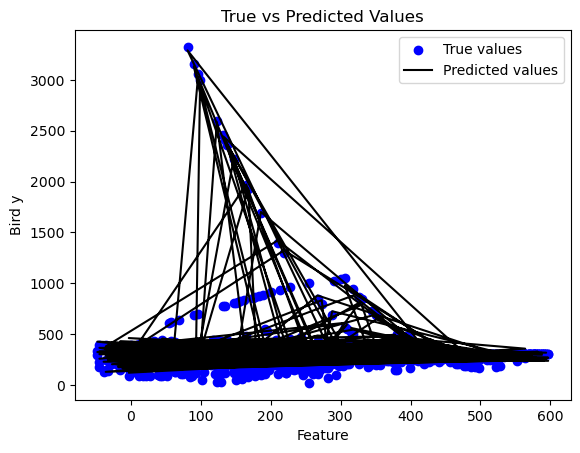

### **Evaluation**

MAE: 56.26
RMSE: 109.25


In [23]:
def polynomial_regression(df, degree=2):
    display(Markdown('# **Polynomial Regression**'))
    scale = MinMaxScaler()
    
    # Display null values
    display(Markdown('### **Null values in the dataset**'))
    print(df.isna().sum())

    # Fill null values with mean
    display(Markdown('### **Filling the Null values with mean**\n'))
    df_filled = df.fillna(df.mean())
    print(df_filled.head())

    # Scale the dataset
    df_scaled = pd.DataFrame(scale.fit_transform(df_filled), columns=df_filled.columns)
    display(Markdown('### **Scaled Dataset**\n'))
    display(df_scaled.head())

    # Plot scatter plot
    g = sns.lmplot(x="pipe_x", y="bird_y", data=df_filled, order=degree, ci=None)
    g.set_axis_labels('Pipe_x_cordinates', 'Bird_y')
    g.fig.suptitle(f'Scatter plot with Polynomial Degree {degree}', y=1.02)
    plt.show()

    # Compute correlation
    display(Markdown('### **Correlation between Features**\n'))
    corr = ((df_scaled.corr().abs()**2)*100)
    plt.figure(figsize=(15,10))
    sns.heatmap(corr, annot=True, square=True)
    plt.tight_layout()
    plt.show()

    # Select best features
    display(Markdown('### **Selecting best features**\n'))
    threshold = .3
    feature_selection = [cols for cols in corr.columns if abs(corr[cols]["bird_y"]) >= threshold]
    print(f"Best Features with correlation more than {threshold}: {feature_selection}\n")
    df_filled = df_filled[feature_selection]

    # Split the data
    display(Markdown('### **Splitting the data into target and features**\n'))
    x = df_filled.drop(['bird_y'], axis=1)
    y = df_filled['bird_y']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)

    # Train the model
    display(Markdown('### **Training the model**\n'))
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Evaluate the model
    display(Markdown('#### **Score of the Model**\n'))
    print(f"Model Score: {model.score(x_test_poly, y_test)*100:.2f}%")

    # Visualization
    display(Markdown('### **Visualization**'))
    y_pred = model.predict(x_test_poly)
    plt.scatter(x_test.iloc[:,0], y_test, color='b', label='True values') 
    plt.plot(x_test.iloc[:,0], y_pred, color='k', label='Predicted values') 
    plt.xlabel('Feature')        
    plt.ylabel('Bird y')          
    plt.title('True vs Predicted Values')
    plt.legend()                  
    plt.show()

    # Evaluation metrics
    display(Markdown('### **Evaluation**'))
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
polynomial_regression(df, degree=2)

### Overvi`ew

The `sgd`_regression` function performs regression analysis on a dataset using Stochastic Gradient Descent (SGD). SGD is an iterative method for optimizing an objective function with suitable smoothness properties and is particularly useful for large datasets.

### Steps in the Function

1. **Handling Missing Values**
   - The function starts by identifying and displaying any missing values in the dataset.
   - It then fills these missing values with the mean of their respective columns to ensure the dataset is complete and ready for analysis.

2. **Scaling the Data**
   - The dataset is normalized using Min-Max scaling, which rescales the feature values to a range between 0 and 1. This step helps in improving the performance and stability of the regression model.

3. **Visualizing Relationships**
   - A scatter plot with a polynomial fit (order 2) is created to visualize the relationship between two specific variables (`pipe_x` and `bird_y`). This helps to understand the nature of their relationship.

4. **Analyzing Feature Correlation**
   - The function calculates and displays the correlation matrix of the scaled dataset as a heatmap. The correlation values are squared and expressed as percentages to highlight the strength of relationships between features.

5. **Selecting Relevant Features**
   - Features are selected based on their correlation with the target variable `bird_y`. Only those features with a correlation above a specified threshold (0.3) are retained for model training.

6. **Splitting the Data**
   - The dataset is divided into feature variables (`x`) and the target variable (`y`). It is then split into training and testing sets, with 20% of the data reserved for testing.

7. **Training the Model**
   - An SGD regression model is instantiated with specified parameters for regularization strength (`alpha`), maximum iterations (`max_iter`), and tolerance for convergence (`tol`). The model is then trained using the training data.

8. **Evaluating the Model**
   - The model’s performance is assessed using the test data. The R² score of the model is computed and displayed as a percentage.

9. **Visualizing Predictions**
   - A scatter plot is used to compare the true values of the target variable with the model's predicted values. This visualization helps in assessing how well the model's predictions align with actual data.

10. **Evaluating Error Metrics**
    - The function calculates and prints Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) to measure the accuracy and error of the model’s predictions.

### Summary

The `sgd_regression` function provides a comprehensive approach to performing regression analysis using Stochastic Gradient Descent. It includes steps for data preprocessing, model training, and evaluation. By using SGD, the function can efficiently handle large datasets and optimize the regression model. The function includes visualizations and metrics to ensure a thorough understanding of the model’s performance and the data.

#### 4. **SGD (Stochastic Gradient Descent) Regression**
   - **Strengths:**
     - Scales well to very large datasets.
     - Efficient with sparse data.
     - Flexible, with support for different loss functions and regularization terms.
   - **Weaknesses:**
     - Sensitive to feature scaling.
     - Requires careful tuning of hyperparameters like learning rate, number of iterations, and regularization.
     - May not converge if hyperparameters are not properly chosen.

![local](images/sdg.png)

# **SGD Regression**

### **Null values in the dataset**

bird_y           0
pipe_x           0
BIRD_VELOCITY    0
pipe_gap_y       0
reward           0
dtype: int64


### **Filling the Null values with mean**


   bird_y  pipe_x  BIRD_VELOCITY  pipe_gap_y  reward
0     300     597            0.0         145     0.1
1     300     594            0.0         145     0.1
2     300     591            0.0         145     0.1
3     300     588            0.0         145     0.1
4     300     585            0.0         145     0.1


### **Scaled Dataset**


,bird_y,pipe_x,BIRD_VELOCITY,pipe_gap_y,reward
0,0.088058,1.000000,0.172932,0.355978,1.0
1,0.088058,0.995349,0.172932,0.355978,1.0
2,0.088058,0.990698,0.172932,0.355978,1.0
3,0.088058,0.986047,0.172932,0.355978,1.0
4,0.088058,0.981395,0.172932,0.355978,1.0


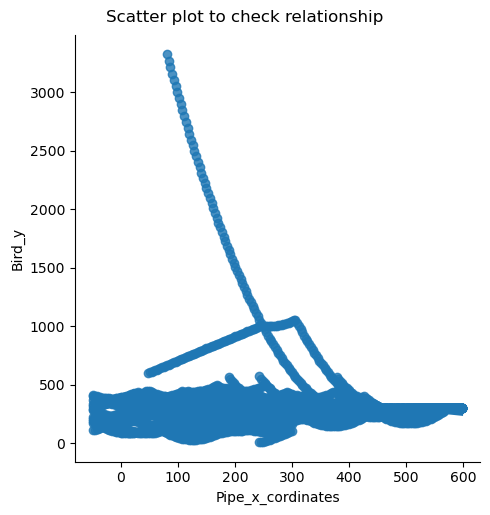

### **Correlation between Features**


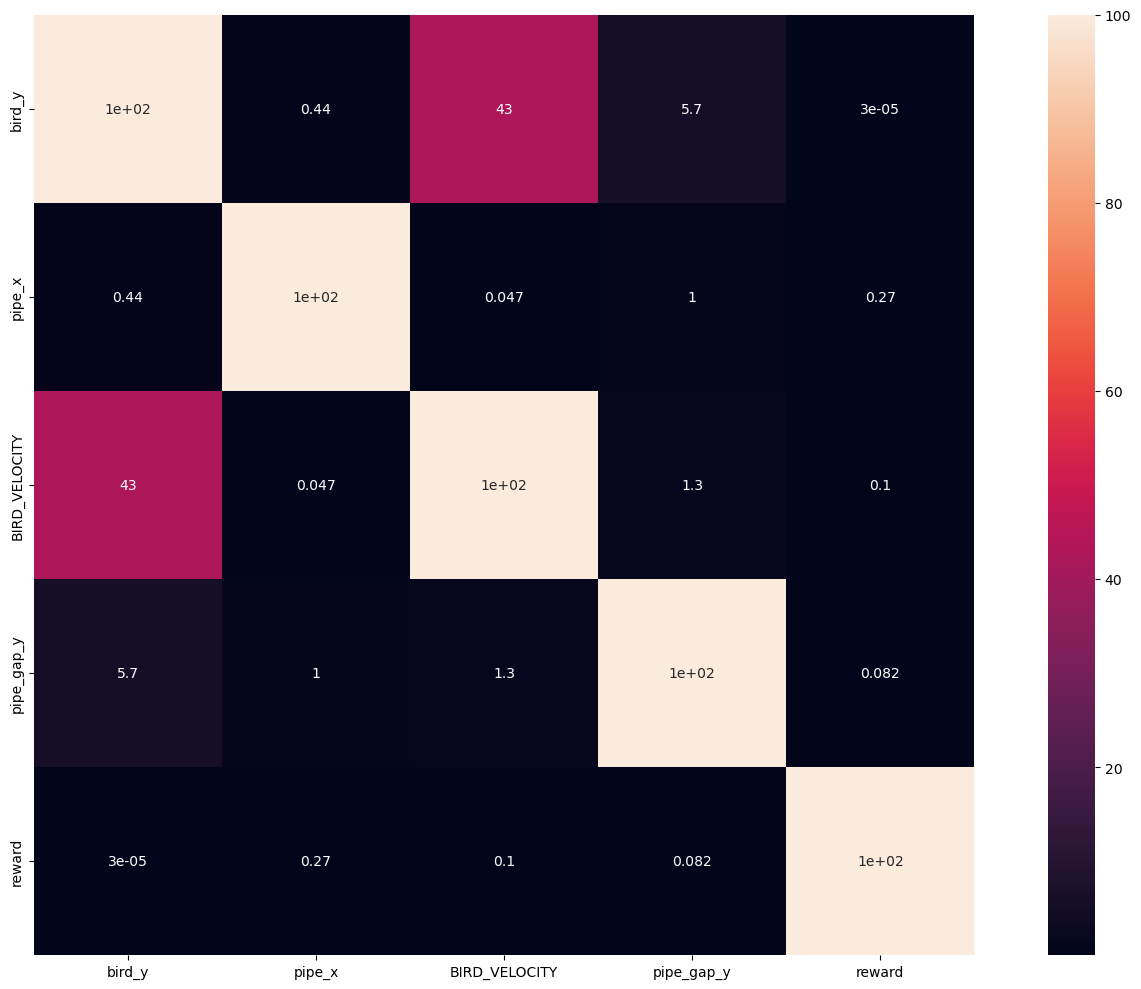

### **Selecting Best Features**


Best Features with correlation more than 0.3: ['bird_y', 'pipe_x', 'BIRD_VELOCITY', 'pipe_gap_y']



,bird_y,pipe_x,BIRD_VELOCITY,pipe_gap_y
0,300,597,0.0,145
1,300,594,0.0,145
2,300,591,0.0,145
3,300,588,0.0,145
4,300,585,0.0,145


### **Splitting the Data into Target and Features**


### **Training the Model**


#### **Score of the Model**


Model Score: -6.0121379668802395e+23%


### **Visualization**

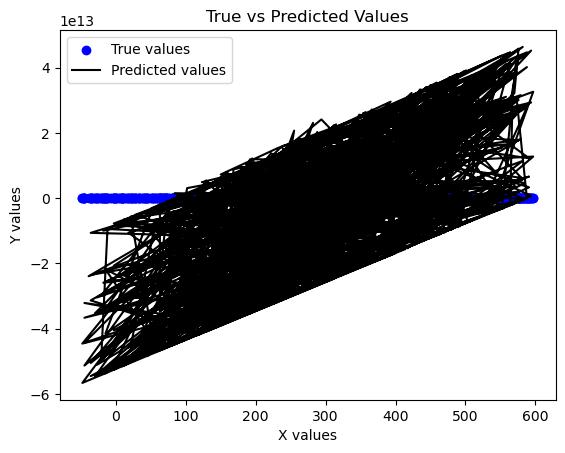

### **Evaluation**

MAE: 19610133131828.637
RMSE: 23838920138162.62


In [28]:
def sgd_regression(df, alpha=0.0001, max_iter=1000, tol=1e-3):
    scale = MinMaxScaler()
    display(Markdown('# **SGD Regression**'))
    display(Markdown('### **Null values in the dataset**'))
    null_value = df.isna().sum()
    print(null_value)

    display(Markdown('### **Filling the Null values with mean**\n'))
    df_filled = df.fillna(df.mean())
    print(df_filled.head())

    df_scaled = pd.DataFrame(scale.fit_transform(df_filled), columns=df.columns)
    display(Markdown('### **Scaled Dataset**\n'))
    display(df_scaled.head())

    g = sns.lmplot(x="pipe_x", y="bird_y", data=df, order=2, ci=None)
    g.set_axis_labels('Pipe_x_cordinates', 'Bird_y')
    g.fig.suptitle('Scatter plot to check relationship', y=1.02)
    plt.show()

    display(Markdown('### **Correlation between Features**\n'))
    corr = (df_scaled.corr().abs()**2) * 100
    plt.figure(figsize=(15, 10))
    sns.heatmap(corr, annot=True, square=True)
    plt.tight_layout()
    plt.show()

    display(Markdown('### **Selecting Best Features**\n'))
    threshold = .3
    feature_selection = [cols for cols in corr.columns if abs(corr[cols]["bird_y"]) >= threshold]
    print(f"Best Features with correlation more than {threshold}: {feature_selection}\n")
    df = df[feature_selection]
    display(df.head())

    display(Markdown('### **Splitting the Data into Target and Features**\n'))
    x = df.drop(['bird_y'], axis=1)
    y = df['bird_y']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    display(Markdown('### **Training the Model**\n'))
    model = SGDRegressor(alpha=alpha, max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)

    display(Markdown('#### **Score of the Model**\n'))
    score = model.score(x_test, y_test) * 100
    print(f"Model Score: {score}%")

    display(Markdown('### **Visualization**'))
    y_pred = model.predict(x_test)
    plt.scatter(x_test.iloc[:, 0], y_test, color='b', label='True values') 
    plt.plot(x_test.iloc[:, 0], y_pred, color='k', label='Predicted values') 
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('True vs Predicted Values')
    plt.legend()
    plt.show()

    display(Markdown('### **Evaluation**'))
    mae = mean_absolute_error(y_test, y_pred) 
    rmse =root_mean_squared_error(y_test, y_pred) 
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")

sgd_regression(df, alpha=0.0001, max_iter=1000, tol=1e-3)

ElasticNet is a linear regression model trained with both 
 and 
-norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of 
 and 
 using the l1_ratio parameter.

Elastic-net is useful when there are multiple features that are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is that it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

The objective function to minimize is in
<br>

![Local](images/elastic.png) this case

#### 5. **Elastic Net Regression**
   - **Strengths:**
     - Combines the benefits of both Ridge and Lasso regression.
     - Useful when there are multiple correlated features.
     - Can perform feature selection while also handling multicollinearity.
   - **Weaknesses:**
     - Requires tuning of two hyperparameters (`alpha` and `l1_ratio`), making it more complex.
     - May not perform well if the assumption of linearity is significantly violated.

![local](images/elastic1.png)

# **Elastic Net Regression**

### **Null values in the dataset**

bird_y           0
pipe_x           0
BIRD_VELOCITY    0
pipe_gap_y       0
reward           0
dtype: int64


### **Filling the Null values with mean**


   bird_y  pipe_x  BIRD_VELOCITY  pipe_gap_y  reward
0     300     597            0.0         145     0.1
1     300     594            0.0         145     0.1
2     300     591            0.0         145     0.1
3     300     588            0.0         145     0.1
4     300     585            0.0         145     0.1


### **Scaled Dataset**


,bird_y,pipe_x,BIRD_VELOCITY,pipe_gap_y,reward
0,0.088058,1.000000,0.172932,0.355978,1.0
1,0.088058,0.995349,0.172932,0.355978,1.0
2,0.088058,0.990698,0.172932,0.355978,1.0
3,0.088058,0.986047,0.172932,0.355978,1.0
4,0.088058,0.981395,0.172932,0.355978,1.0


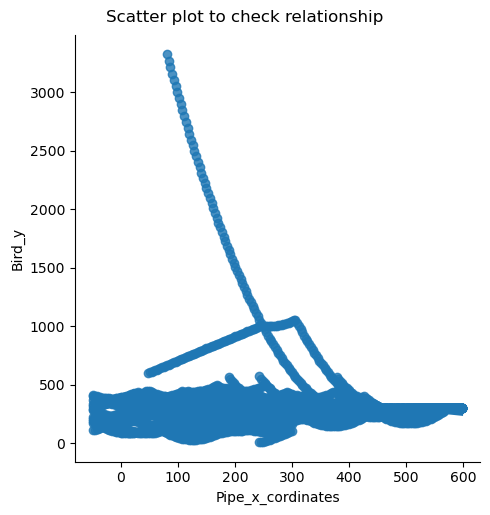

### **Correlation between Features**


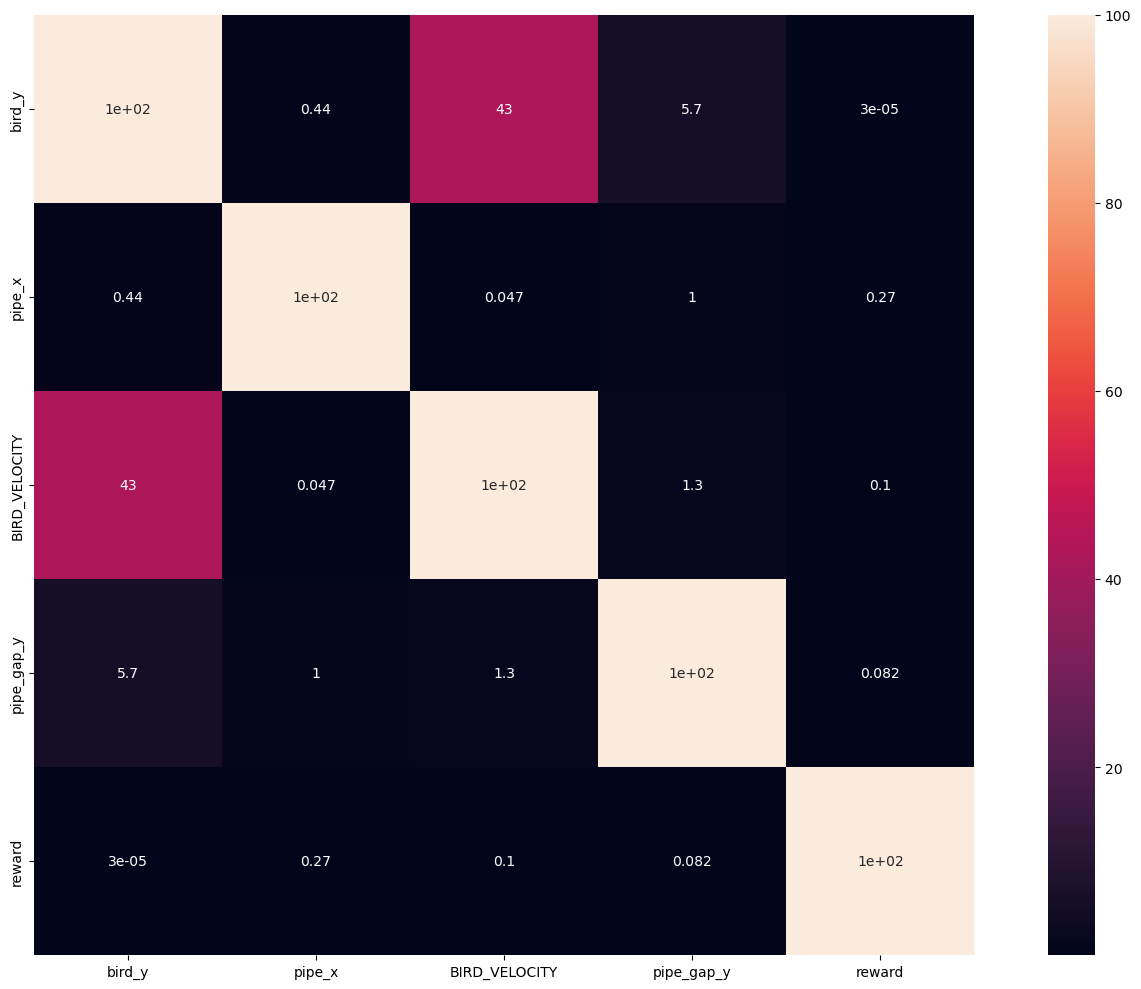

### **Selecting Best Features**


Best Features with correlation more than 0.3: ['bird_y', 'pipe_x', 'BIRD_VELOCITY', 'pipe_gap_y']



,bird_y,pipe_x,BIRD_VELOCITY,pipe_gap_y
0,300,597,0.0,145
1,300,594,0.0,145
2,300,591,0.0,145
3,300,588,0.0,145
4,300,585,0.0,145


### **Splitting the Data into Target and Features**


### **Training the Model**


#### **Score of the Model**


Model Score: 50.496788037275934%


### **Visualization**

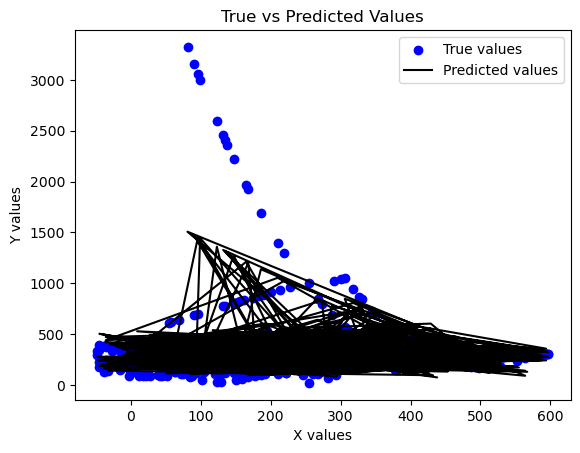

### **Evaluation**

MAE: 119.11046949698768
RMSE: 216.31607735210764


In [33]:
def elastic_net_regression(df, alpha=1.0, l1_ratio=0.5):
    scale = MinMaxScaler()
    display(Markdown('# **Elastic Net Regression**'))
    display(Markdown('### **Null values in the dataset**'))
    null_value = df.isna().sum()
    print(null_value)

    display(Markdown('### **Filling the Null values with mean**\n'))
    df_filled = df.fillna(df.mean())
    print(df_filled.head())

    df_scaled = pd.DataFrame(scale.fit_transform(df_filled), columns=df.columns)
    display(Markdown('### **Scaled Dataset**\n'))
    display(df_scaled.head())

    g = sns.lmplot(x="pipe_x", y="bird_y", data=df, order=2, ci=None)
    g.set_axis_labels('Pipe_x_cordinates', 'Bird_y')
    g.fig.suptitle('Scatter plot to check relationship', y=1.02)
    plt.show()

    display(Markdown('### **Correlation between Features**\n'))
    corr = (df_scaled.corr().abs()**2) * 100
    plt.figure(figsize=(15, 10))
    sns.heatmap(corr, annot=True, square=True)
    plt.tight_layout()
    plt.show()

    display(Markdown('### **Selecting Best Features**\n'))
    threshold = .3
    feature_selection = [cols for cols in corr.columns if abs(corr[cols]["bird_y"]) >= threshold]
    print(f"Best Features with correlation more than {threshold}: {feature_selection}\n")
    df = df[feature_selection]
    display(df.head())

    display(Markdown('### **Splitting the Data into Target and Features**\n'))
    x = df.drop(['bird_y'], axis=1)
    y = df['bird_y']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    display(Markdown('### **Training the Model**\n'))
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(x_train, y_train)

    display(Markdown('#### **Score of the Model**\n'))
    score = model.score(x_test, y_test) * 100
    print(f"Model Score: {score}%")

    display(Markdown('### **Visualization**'))
    y_pred = model.predict(x_test)
    plt.scatter(x_test.iloc[:, 0], y_test, color='b', label='True values') 
    plt.plot(x_test.iloc[:, 0], y_pred, color='k', label='Predicted values') 
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('True vs Predicted Values')
    plt.legend()
    plt.show()

    display(Markdown('### **Evaluation**'))
    mae = mean_absolute_error(y_test, y_pred) 
    rmse = root_mean_squared_error(y_test, y_pred) 
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")

elastic_net_regression(df, alpha=1.0, l1_ratio=0.5)

The method of `Support Vector Classification` can be extended to solve regression problems. This method is called Support Vector Regression.

The model produced by support vector classification (as described above) depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function ignores samples whose prediction is close to their target.

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR. Due to its implementation in liblinear LinearSVR also regularizes the intercept, if considered. This effect can however be reduced by carefully fine tuning its intercept_scaling parameter, which allows the intercept term to have a different regularization behavior compared to the other features. The classification results and score can therefore differ from the other two classifiers. See Implementation details for further details.

#### 6. **Linear SVR (Support Vector Regression)**
   - **Strengths:**
     - Robust to outliers due to the use of ε-insensitive loss.
     - Effective in high-dimensional spaces.
     - Can handle non-linear relationships when used with appropriate kernels (e.g., RBF, polynomial).
   - **Weaknesses:**
     - Requires careful tuning of parameters like `C`, `epsilon`, and `max_iter`.
     - Computationally expensive for large datasets.
     - Interpretation of the model is not as straightforward as linear regression.

![local](images/svr.png)

# **Linear SVR Regression**

### **Null values in the dataset**

bird_y           0
pipe_x           0
BIRD_VELOCITY    0
pipe_gap_y       0
reward           0
dtype: int64


### **Filling the Null values with mean**


   bird_y  pipe_x  BIRD_VELOCITY  pipe_gap_y  reward
0     300     597            0.0         145     0.1
1     300     594            0.0         145     0.1
2     300     591            0.0         145     0.1
3     300     588            0.0         145     0.1
4     300     585            0.0         145     0.1


### **Scaled Dataset**


,bird_y,pipe_x,BIRD_VELOCITY,pipe_gap_y,reward
0,0.088058,1.000000,0.172932,0.355978,1.0
1,0.088058,0.995349,0.172932,0.355978,1.0
2,0.088058,0.990698,0.172932,0.355978,1.0
3,0.088058,0.986047,0.172932,0.355978,1.0
4,0.088058,0.981395,0.172932,0.355978,1.0


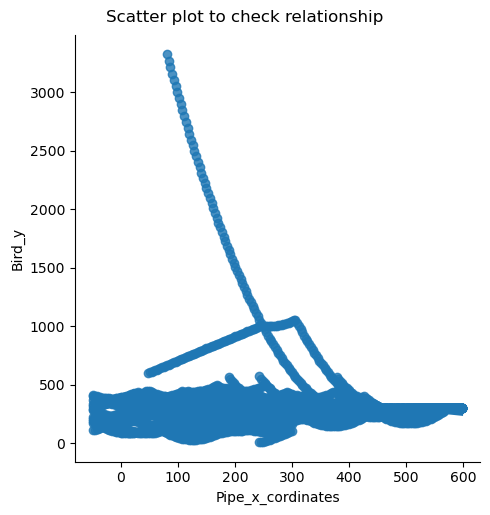

### **Correlation between Features**


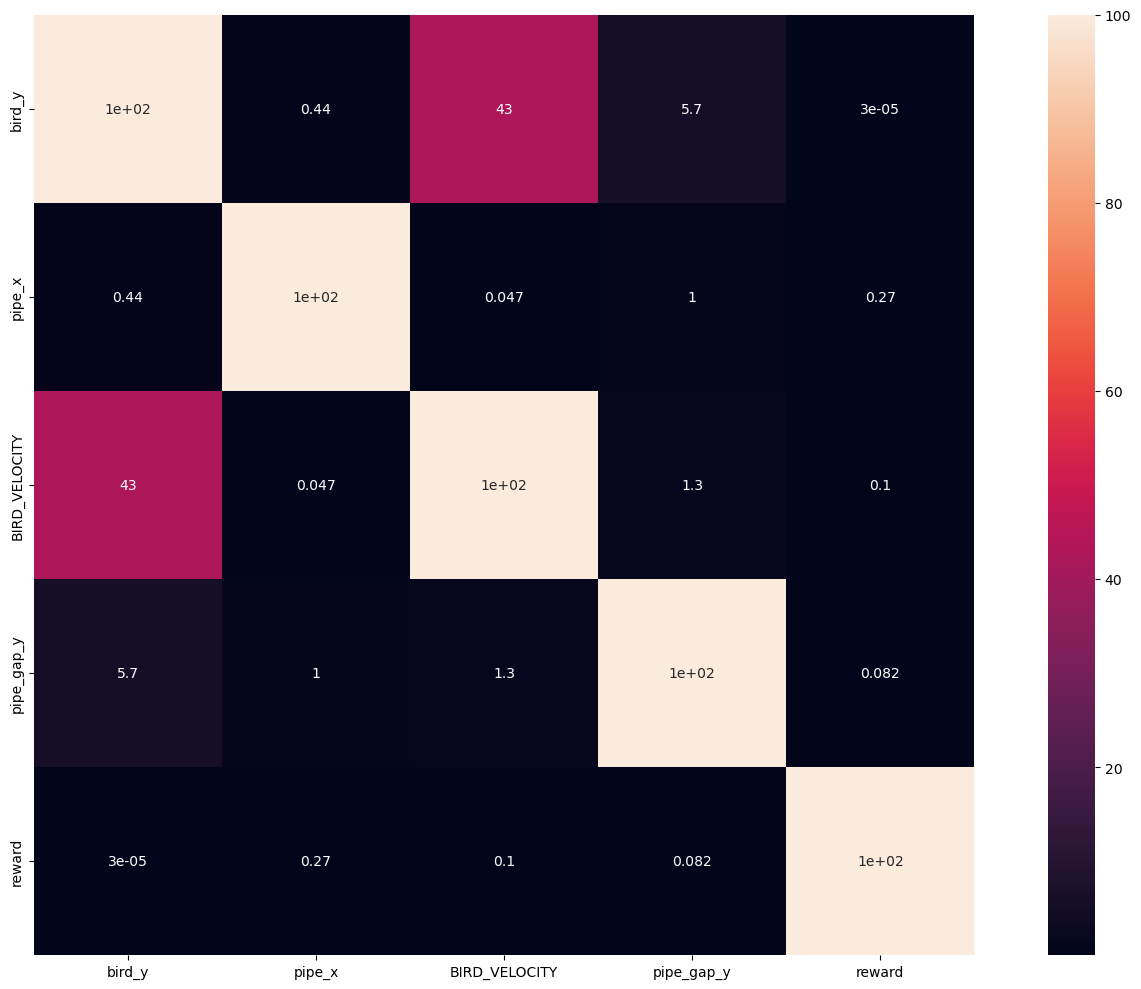

### **Selecting Best Features**


Best Features with correlation more than 0.3: ['bird_y', 'pipe_x', 'BIRD_VELOCITY', 'pipe_gap_y']



,bird_y,pipe_x,BIRD_VELOCITY,pipe_gap_y
0,300,597,0.0,145
1,300,594,0.0,145
2,300,591,0.0,145
3,300,588,0.0,145
4,300,585,0.0,145


### **Splitting the Data into Target and Features**


### **Training the Model**


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### **Score of the Model**


Model Score: 14.464745723545668%


### **Visualization**

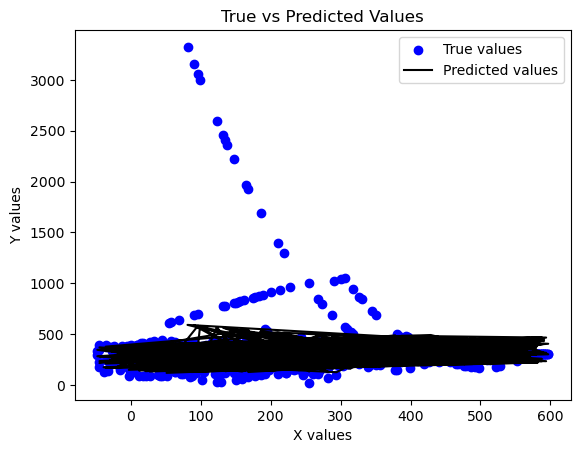

### **Evaluation**

MAE: 110.71580292058592
RMSE: 284.34440360080515


In [38]:
def linear_svr_regression(df, epsilon=0.0, C=1.0, max_iter=1000):
    scale = MinMaxScaler()
    display(Markdown('# **Linear SVR Regression**'))
    display(Markdown('### **Null values in the dataset**'))
    null_value = df.isna().sum()
    print(null_value)

    display(Markdown('### **Filling the Null values with mean**\n'))
    df_filled = df.fillna(df.mean())
    print(df_filled.head())

    df_scaled = pd.DataFrame(scale.fit_transform(df_filled), columns=df.columns)
    display(Markdown('### **Scaled Dataset**\n'))
    display(df_scaled.head())

    g = sns.lmplot(x="pipe_x", y="bird_y", data=df, order=2, ci=None)
    g.set_axis_labels('Pipe_x_cordinates', 'Bird_y')
    g.fig.suptitle('Scatter plot to check relationship', y=1.02)
    plt.show()

    display(Markdown('### **Correlation between Features**\n'))
    corr = (df_scaled.corr().abs()**2) * 100
    plt.figure(figsize=(15, 10))
    sns.heatmap(corr, annot=True, square=True)
    plt.tight_layout()
    plt.show()

    display(Markdown('### **Selecting Best Features**\n'))
    threshold = .3
    feature_selection = [cols for cols in corr.columns if abs(corr[cols]["bird_y"]) >= threshold]
    print(f"Best Features with correlation more than {threshold}: {feature_selection}\n")
    df = df[feature_selection]
    display(df.head())

    display(Markdown('### **Splitting the Data into Target and Features**\n'))
    x = df.drop(['bird_y'], axis=1)
    y = df['bird_y']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    display(Markdown('### **Training the Model**\n'))
    model = LinearSVR(epsilon=epsilon, C=C, max_iter=max_iter)
    model.fit(x_train, y_train)

    display(Markdown('#### **Score of the Model**\n'))
    score = model.score(x_test, y_test) * 100
    print(f"Model Score: {score}%")

    display(Markdown('### **Visualization**'))
    y_pred = model.predict(x_test)
    plt.scatter(x_test.iloc[:, 0], y_test, color='b', label='True values') 
    plt.plot(x_test.iloc[:, 0], y_pred, color='k', label='Predicted values') 
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('True vs Predicted Values')
    plt.legend()
    plt.show()

    display(Markdown('### **Evaluation**'))
    mae = mean_absolute_error(y_test, y_pred) 
    rmse = root_mean_squared_error(y_test, y_pred) 
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")

linear_svr_regression(df, epsilon=0.0, C=1.0, max_iter=1000)

### Summary

Each regression model has its unique strengths and weaknesses, making them suitable for different types of data and problem settings:

- **Ridge Regression** is good for preventing overfitting and handling multicollinearity.
- **Lasso Regression** is useful for feature selection and interpretation.
- **Polynomial Regression** can model non-linear relationships but may overfit.
- **SGD Regression** is scalable for large datasets but requires careful tuning.
- **Elastic Net Regression** balances between Ridge and Lasso, handling multicollinearity and feature selection.
- **Linear SVR** is robust to outliers and effective in high-dimensional spaces but requires significant tuning.

The choice of the model should be guided by the specific characteristics of the dataset and the problem at hand, along with considerations of interpretability, computational cost, and scalability.